In [1]:
#-----01 within user----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
import time


In [2]:
# --------starts here-------
skip_list = [3,8]
#label
y=[]
# for k in range(10):#num of participants

for i in range(14):
    if i in skip_list:
        continue
    for j in range(30):
        y.append(i)
# print(y)

skip_len = len(y)
print(len(y))

tsfresh_feature = pd.read_csv("../data/final_filtered2400.csv")
tsfresh_feature = tsfresh_feature.drop(["id"],axis=1)

selected_list = []
for i in range(10):
    for j in range(14):
        if(j in skip_list):continue
        for k in range(30):
            selected_list.append(i*420+j*30+k)
# print(selected_list)

# print(tsfresh_feature.iloc[selected_list])
tsfresh_feature = tsfresh_feature.iloc[selected_list]
print(tsfresh_feature.shape)

360
(3600, 486)


In [35]:
# tsfresh_feature

In [3]:
#------ adding features from Shutong ------#
# fftfeatures1 = np.loadtxt(fname = "data/22gesture.txt",delimiter=',')
# fftfeatures = np.loadtxt(fname = "data/qstSpectro.txt",delimiter=',')
# fftfeatures = np.concatenate((fftfeatures1,fftfeatures2),axis=0)
fftfeatures = np.loadtxt(fname = "../data/fftFeature2400.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:][0])
fft_df = pd.DataFrame(data=fftfeatures[:],    # values
              index=[i for i in range(4200)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)])

fft_df = fft_df.iloc[selected_list]
print(fft_df.shape)
features_combine = fft_df.join(tsfresh_feature)
features_combine.shape

(4200, 100)
(3600, 100)


(3600, 586)

In [4]:
y = y
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list = []
train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]
# for i in range(10,20):
seconds = time.time()
for people in range(10):
    #get each user
    X = features_combine[people*skip_len:(people+1)*skip_len]
    for i in range(10,20):
        for j in range(10,20):
            x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)
            if (temp > maxyhat_train[people]).any():
                maxyhat_train[people] = temp
            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)
            feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
            if (maxyhat_test[people] < temp).any():
                maxyhat_test[people] = temp
                for feature in feature_importances.index.tolist()[:50]:
                    if not feature in feature_list:
                        feature_list.append(feature)
    seconds = time.time()-seconds
    print(seconds)
    seconds = time.time()
   
    print(maxyhat_test)
print(maxyhat_train)

KeyboardInterrupt: 

In [46]:
mylist = []
for i in range(10):
    mylist.append(np.max(test_results[i]))
print(mylist)
print(np.mean(mylist))
print(np.std(mylist))

[0.9583333333333334, 0.9166666666666666, 1.0, 0.9583333333333334, 0.9444444444444444, 0.9722222222222222, 0.9027777777777778, 0.9305555555555556, 0.9305555555555556, 1.0]
0.951388888888889
0.031211395908672546


In [ ]:
# len(feature_list)
# import pickle


# with open('feature_list.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(feature_list, filehandle)

In [ ]:
# y = y
# maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
# maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
# temp = 0
# train_results = [[],[],[],[],[],[],[],[],[],[]]
# test_results = [[],[],[],[],[],[],[],[],[],[]]
# # for i in range(10,20):
# seconds = time.time()
# for people in range(10):
#     #get each user
#     X = features_combine[people*skip_len:(people+1)*skip_len]
#     for i in range(10,20):
#         for j in range(10,20):
#             x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.5, test_size=0.5)
            
#             clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
#             clf.fit(x_train, y_train)
#             temp = clf.score(x_train, y_train)
#             train_results[people].append(temp)
#             if (temp > maxyhat_train[people]).any():
#                 maxyhat_train[people] = temp
#             temp = clf.score(x_test, y_test)
#             test_results[people].append(temp)
#             feature_importances = pd.DataFrame(clf.feature_importances_,
#                                    index = x_train.columns,
#                                     columns=['importance']).sort_values('importance',ascending=False).sort_values('importance',ascending=False)
#             if (maxyhat_test[people] < temp).any():
#                 maxyhat_test[people] = temp
              
#     seconds = time.time()-seconds
#     print(seconds)
#     seconds = time.time()
# print(maxyhat_train)
# print(maxyhat_test)

In [ ]:
# mylist = []
# for i in range(10):
#     mylist.append(np.max(test_results[i]))
# print(mylist)
# print(np.mean(mylist))


In [ ]:
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
# line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('n_estimators')
# plt.show()

In [38]:
x_max=[]
y_max=[]
for i in range(10):
    x_max.append(10+int(np.argmax(test_results[i])/10))
    y_max.append(10+np.argmax(test_results[i])%10)
    print(np.argmax(test_results[i]))

71
65
47
51
71
19
13
5
5
74


In [39]:
print(x_max)
print(y_max)

[17, 16, 14, 15, 17, 11, 11, 10, 10, 17]
[11, 15, 17, 11, 11, 19, 13, 15, 15, 14]


In [6]:
# x_max = [17, 16, 14, 15, 17, 11, 11, 10, 10, 17]
# y_max = [11, 15, 17, 11, 11, 19, 13, 15, 15, 14]

0.9583333333333334
0.9166666666666666
1.0
0.9583333333333334
0.9444444444444444
0.9722222222222222
0.9027777777777778
0.9305555555555556
0.9305555555555556
1.0
[9, 11, 12, 10, 4, 2, 7, 0, 12, 9, 10, 11, 4, 5, 9, 13, 1, 6, 11, 4, 10, 11, 7, 2, 13, 5, 10, 2, 11, 1, 9, 0, 9, 13, 0, 11, 6, 0, 13, 7, 2, 4, 9, 13, 13, 12, 1, 1, 1, 4, 11, 12, 10, 6, 11, 9, 13, 12, 10, 9, 9, 4, 9, 5, 7, 6, 2, 2, 0, 9, 7, 13]
[9, 11, 12, 10, 4, 5, 7, 0, 12, 9, 10, 11, 4, 5, 13, 13, 1, 6, 11, 4, 10, 11, 7, 2, 13, 5, 10, 2, 11, 1, 9, 0, 9, 13, 0, 11, 6, 0, 13, 7, 2, 4, 9, 13, 13, 12, 1, 1, 1, 4, 11, 12, 10, 6, 11, 9, 13, 12, 10, 9, 9, 4, 9, 5, 7, 6, 12, 2, 0, 9, 7, 13]
Normalized confusion matrix


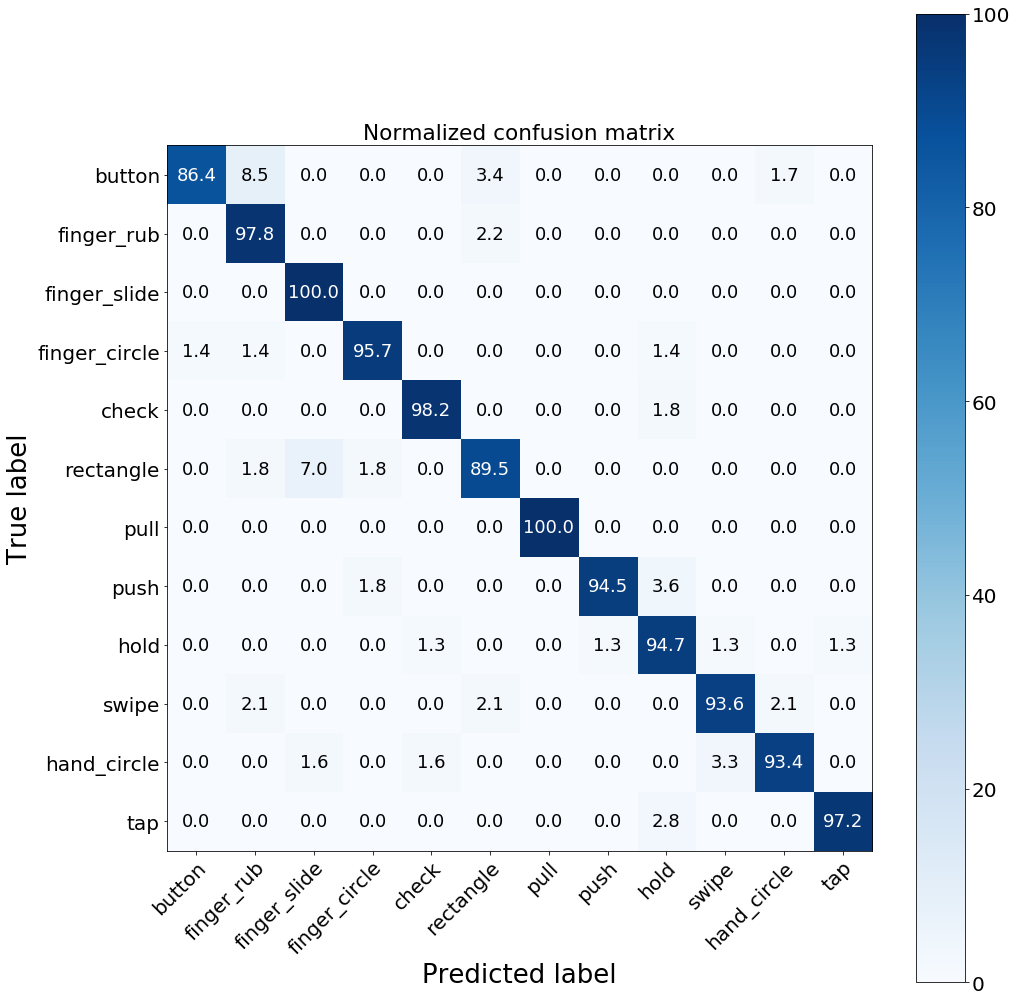

[1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


In [7]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0



fig = None
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    global fig
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.rcParams.update({'font.size': 18})
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=26)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names=['button','check','hand_circle','double_tap','swipe','finger_rub',
         'finger_slide','hold','slow_swipe','pull','push','rect','finger_circle',
         'single_tap']
v2_names_sort = ['button','finger_rub','finger_slide','','finger_circle','check','rectangle','pull','','push','hold','swipe','hand_circle','tap']
projection = [0,5,12,3,11,1,2,10,8,7,9,6,4,13]
v2_names_sort = np.array(v2_names_sort)
v2_names = np.array(v2_names)

y_pred = []
y_test_ = []

for people in range(10):
    #get each user
    X = features_combine[people*skip_len:(people+1)*skip_len]
    i=x_max[people]
    j=y_max[people]
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)

    clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
    clf.fit(x_train, y_train)
    print(clf.score(x_test,y_test))
    y_pred = y_pred+list(clf.predict(x_test))
#     print(list(clf.predict(x_test)))
#     print(y_test)
#     plot_confusion_matrix(y_test, clf.predict(x_test), classes=v2_names, normalize=True,title='')
#     plt.show()
#     fig.savefig("sacrilegous/"+str(people)+".png", bbox_inches = "tight")
    y_test_ += y_test
    
y_test_new = []
y_pred_new = []
for i in range(len(y_test)):
    y_test_new.append(projection[y_test_[i]])
    y_pred_new.append(projection[y_pred[i]])
print(y_test_new)   
print(y_pred_new)

plot_confusion_matrix(y_test_, y_pred, classes=v2_names_sort, normalize=True,title='')
plt.show()

seconds = time.time()-seconds
#     print(seconds)
seconds = time.time()
print(maxyhat_train)
print(maxyhat_test)
fig.savefig("2400_within_5fold.pdf", bbox_inches = "tight")

In [ ]:
from joblib import dump, load
dump(clf, '4200.joblib')

In [ ]:
clf2 = load('filename.joblib')